In [325]:
# Supress Warnings
    
import warnings
warnings.filterwarnings('ignore')

In [326]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [327]:
uber = pd.read_csv("C:\\Users\\jgusun3\\Downloads\\Uber Request Data.csv")
# Write your code for importing the csv file here
uber.shape
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [328]:
#Establishing different columns and changing date-time format
uber['Request timestamp'] = uber['Request timestamp'].str.replace("/", "-")
uber['Drop timestamp'] = uber['Drop timestamp'].str.replace("/", "-")
uber['Request timestamp'] = uber['Request timestamp'].astype('str')
uber['Drop timestamp'] = uber['Drop timestamp'].astype('str')
uber['Request timestamp'] = uber['Request timestamp'].apply(lambda x: x[:-3] if len(x)> 15 else x)
uber['Drop timestamp'] = uber['Drop timestamp'].apply(lambda x: x[:-3] if len(x)> 15 else x)
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], format='%d-%m-%Y %H:%M')
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'], format='%d-%m-%Y %H:%M')
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00


In [329]:
#Calculating and convertimg TripTime
uber['TripTime']= (uber['Drop timestamp'] - uber['Request timestamp'])
uber['TripTime']=(uber['TripTime'].dt.seconds/60)
uber['24 Hour Time'] = uber['Request timestamp'].dt.hour
bins = [0, 5, 9, 12, 16, 21, 24]
labels = ['Mid Night','Early Morning','Morning','Noon','Evening','Late Evening']
uber['TimeSlots'] = pd.cut(uber['24 Hour Time'], bins=bins, labels=labels,include_lowest=True)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripTime,24 Hour Time,TimeSlots
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0,11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,17,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,9,Early Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,52.0,8,Early Morning


In [330]:
#Number of nulls columnwise
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
TripTime             3914
24 Hour Time            0
TimeSlots               0
dtype: int64

In [331]:
#Number of No cars Available
uber[(uber['Driver id'].isnull()) & (uber['Status']=='No Cars Available')].shape[0]

2650

In [332]:
#Number of Cancelled Trips
uber[(uber['Drop timestamp'].isnull()) & (uber['Status']=='Cancelled')].shape[0]

1264

In [333]:
#Percentages of Null in Drop Timestamp column
round(uber['Drop timestamp'].isnull().sum()/len(uber['Drop timestamp'])*100,2)

58.03

In [334]:
#Percentages of Null in Driver ID column
round(uber['Driver id'].isnull().sum()/len(uber['Driver id'])*100,2)

39.29

In [335]:
#Cancelled Status at Airport
uber[(uber['Status']=='Cancelled') & (uber['Pickup point']=='Airport')].shape[0]

198

In [336]:
#Cancelled Status at City
uber[(uber['Status']=='Cancelled') & (uber['Pickup point']=='City')].shape[0]

1066

In [337]:
#No Cars Available at Airport
uber[(uber['Status']=='No Cars Available') & (uber['Pickup point']=='Airport')].shape[0]

1713

In [338]:
#No Cars Available at City 
uber[(uber['Status']=='No Cars Available') & (uber['Pickup point']=='City')].shape[0]

937

In [339]:
#Trips completed
uber[uber['Status']=='Trip Completed'].shape[0]

2831

In [340]:
#Request ratio
uber[uber['Status']=='Trip Completed'].shape[0]/uber.shape[0]*100

41.971830985915496

Text(0.5, 1.0, 'Trip Completion Ratio w.r.t different timeslots')

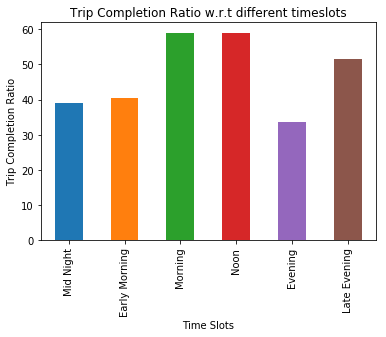

In [341]:
#Request Ratio VS TimeSlots
o=uber[uber['Status']=='Trip Completed'].groupby('TimeSlots').Status.count()/uber.groupby('TimeSlots').Status.count()*100
o.plot(kind='bar')
plt.ylabel('Trip Completion Ratio')
plt.xlabel('Time Slots')
plt.title('Trip Completion Ratio w.r.t different timeslots')

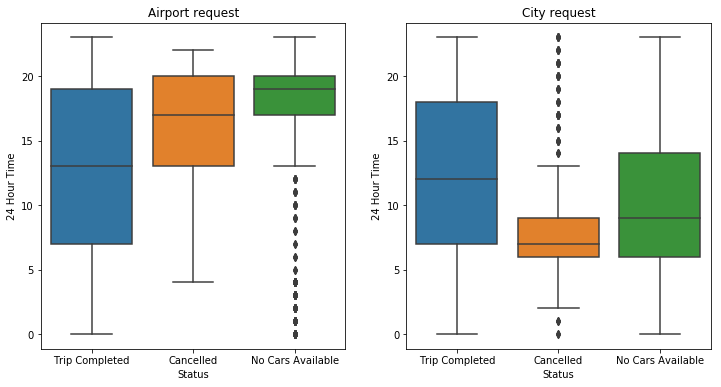

In [342]:
#Boxplot of Request Type against 24 Hour Time
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Airport request')
sns.boxplot(x='Status', y='24 Hour Time', data=uber[uber['Pickup point']=='Airport'])
plt.subplot(1, 2, 2)
plt.title('City request')
sns.boxplot(x='Status', y='24 Hour Time', data=uber[uber['Pickup point']=='City'])
plt.show()

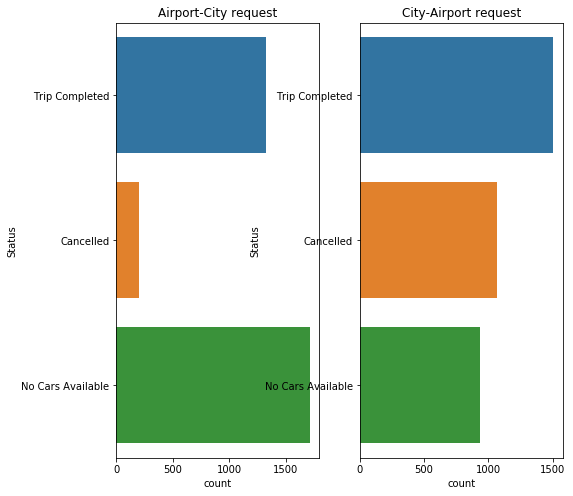

In [343]:
#Countplot for all three Status
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.title('Airport-City request')
sns.countplot(y="Status", data=uber[uber['Pickup point']=='Airport'])
plt.subplot(1, 2, 2)
plt.title('City-Airport request')
sns.countplot(y="Status", data=uber[uber['Pickup point']=='City'])
plt.show()

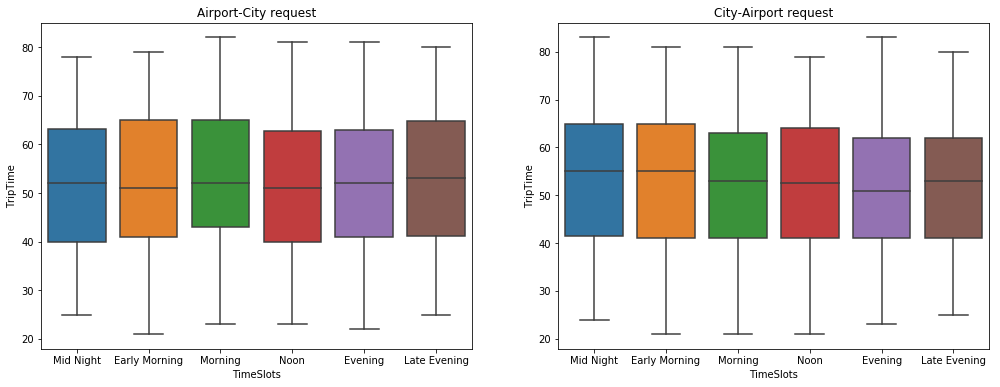

In [344]:
#Trip time for differnt time slots at Airport and Cities
plt.figure(figsize=(17,6))
plt.subplot(1, 2, 1)
plt.title('Airport-City request')
sns.boxplot(x='TimeSlots', y='TripTime', data=uber[uber['Pickup point']=='Airport'])
plt.subplot(1, 2, 2)
plt.title('City-Airport request')
sns.boxplot(x='TimeSlots', y='TripTime', data=uber[uber['Pickup point']=='City'])
plt.show()

Text(0.5, 1.0, 'Trips Completed for Airport-City type Requests')

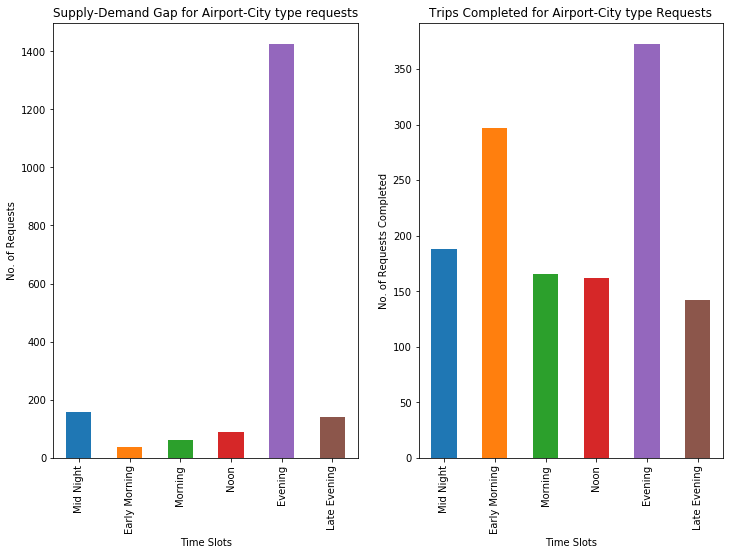

In [345]:
#Supply and demand plot for Airport type requests
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
tf_time = uber[(uber['Status']!="Trip Completed") & (uber['Pickup point']=="Airport")].groupby('TimeSlots').Status.count()
tf_time.plot(kind='bar')
plt.ylabel('No. of Requests')
plt.xlabel('Time Slots')
plt.title('Supply-Demand Gap for Airport-City type requests')
plt.subplot(1, 2, 2)
df_time = uber[(uber['Status']=="Trip Completed") & (uber['Pickup point']=="Airport")].groupby('TimeSlots').Status.count()
df_time.plot(kind='bar')
plt.ylabel('No. of Requests Completed')
plt.xlabel('Time Slots')
plt.title('Trips Completed for Airport-City type Requests')

Text(0.5, 1.0, 'Cars Unavailable for City-Airport type requests')

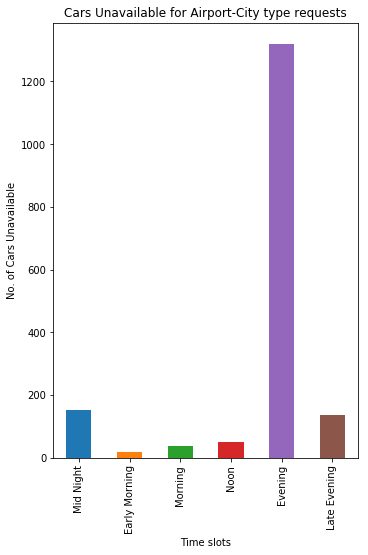

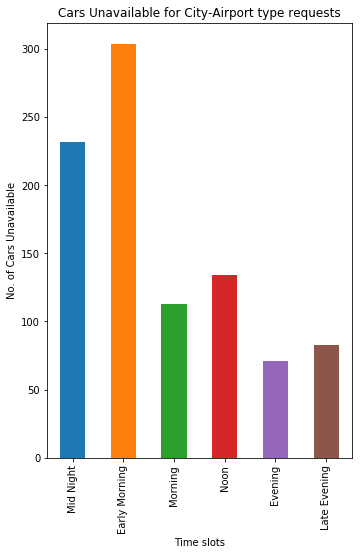

In [346]:
#Plot for Unavailable Trips for both type of Requests
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
df_time = uber[(uber['Status']=="No Cars Available") & (uber['Pickup point']=="Airport")].groupby('TimeSlots').Status.count()
df_time.plot(kind='bar')
plt.ylabel('No. of Cars Unavailable')
plt.xlabel('Time slots')
plt.title('Cars Unavailable for Airport-City type requests')

plt.figure(figsize=(12,8))
plt.subplot(1,2,2)
df_time = uber[(uber['Status']=="No Cars Available") & (uber['Pickup point']=="City")].groupby('TimeSlots').Status.count()
df_time.plot(kind='bar')
plt.ylabel('No. of Cars Unavailable')
plt.xlabel('Time slots')
plt.title('Cars Unavailable for City-Airport type requests')

Text(0.5, 1.0, 'Requests Cancelled for City-Airport type requests')

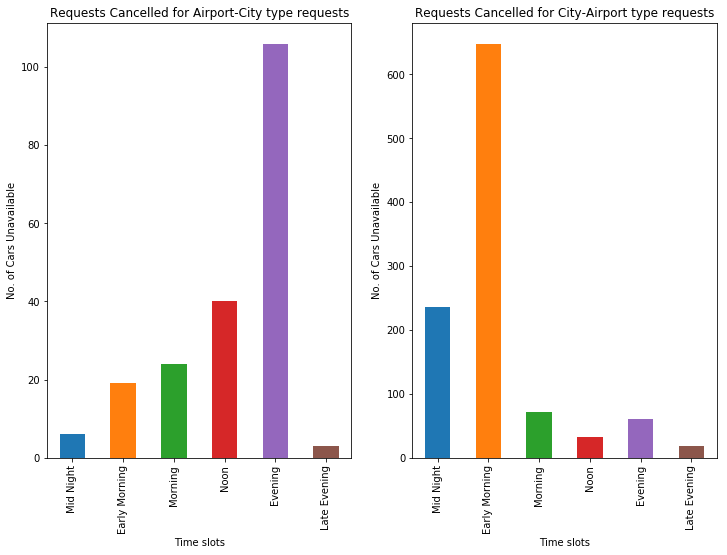

In [347]:
#Plot for Cancelled Trips for both type of Requests
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
df_time = uber[(uber['Status']=="Cancelled") & (uber['Pickup point']=="Airport")].groupby('TimeSlots').Status.count()
df_time.plot(kind='bar')
plt.ylabel('No. of Cars Unavailable')
plt.xlabel('Time slots')
plt.title('Requests Cancelled for Airport-City type requests')

plt.subplot(1, 2, 2)
df_time = uber[(uber['Status']=="Cancelled") & (uber['Pickup point']=="City")].groupby('TimeSlots').Status.count()
df_time.plot(kind='bar')
plt.ylabel('No. of Cars Unavailable')
plt.xlabel('Time slots')
plt.title('Requests Cancelled for City-Airport type requests')

Text(0.5, 1.0, 'Trips Completed for City-Airport type requests')

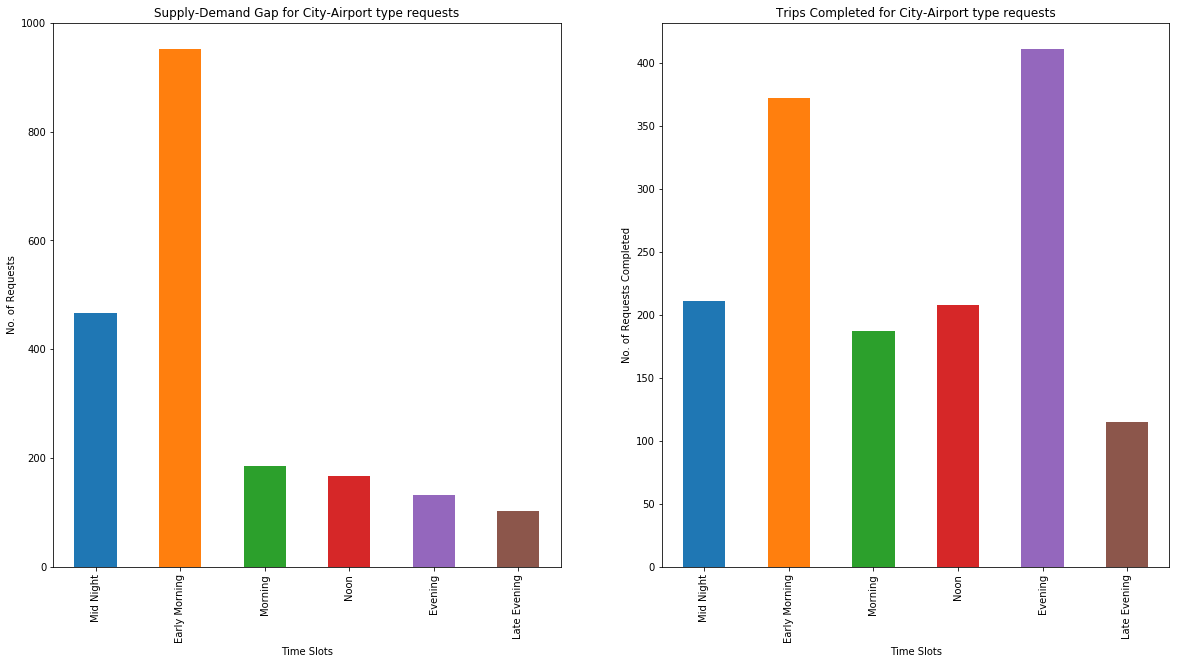

In [348]:
#Supply demand Gap plots for City-Airport type requests
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
tf_time = uber[(uber['Status']!="Trip Completed") & (uber['Pickup point']=="City")].groupby('TimeSlots').Status.count()
tf_time.plot(kind='bar')
plt.title('Supply-Demand Gap for City-Airport type requests')
plt.xlabel('Time Slots')
plt.ylabel('No. of Requests')

plt.subplot(1, 2, 2)
df_time = uber[(uber['Status']=="Trip Completed") & (uber['Pickup point']=="City")].groupby('TimeSlots').Status.count()
df_time.plot(kind='bar')
plt.ylabel('No. of Requests Completed')
plt.xlabel('Time Slots')
plt.title('Trips Completed for City-Airport type requests')
